In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Carga de librerías.

In [2]:
from IPython.core.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer 
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score

Lectura de datos:

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos_practica_small_20k_con_mes.csv')

In [6]:
#Número de filas y columnas
df.shape

(20000, 36)

In [7]:
df[:2]

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
0,201901,232.121597,10.186000,0.000000,4523.0,1183.0,28.0,232.121597,39.0,54.0,...,21.683399,0,1.7678,0,100.0,2,1,0.0,0.264612,0
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,...,166.050007,435,5.5550,0,100.0,1,2,0.0,0.380171,0


In [8]:
df.describe()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
count,20000.000000,19741.000000,19924.000000,19924.000000,19843.000000,19843.000000,19843.000000,19749.000000,19971.000000,19843.000000,...,19749.000000,20000.000000,19924.000000,20000.00000,19737.000000,20000.000000,20000.000000,19918.000000,18677.000000,20000.000000
mean,201948.470400,12307.320625,40.939452,25.179305,19282.843471,10334.947941,62.941239,12288.026161,43.990937,156.408456,...,361.817034,148.792200,5.657482,0.00785,99.975217,1.432750,1.792750,0.913010,0.257017,0.311050
std,49.255692,20115.499610,30.326117,13.067181,31773.406451,18971.928733,93.528782,20112.795794,14.125926,227.913588,...,543.391221,476.199046,3.552509,0.10435,1.284268,0.756972,1.329882,30.432569,0.073077,0.462935
min,201901.000000,0.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,-1.190000,0.00000,0.000000,1.000000,0.000000,0.000000,0.039562,0.000000
25%,201905.000000,1929.673340,24.999000,15.700000,1777.000000,705.500000,11.000000,1915.529785,33.000000,29.000000,...,64.999998,0.000000,3.297000,0.00000,100.000000,1.000000,1.000000,0.000000,0.199451,0.000000
50%,201911.000000,5931.522949,33.004000,23.969999,8011.000000,3631.000000,36.000000,5898.413086,43.000000,87.000000,...,178.966798,1.000000,5.034000,0.00000,100.000000,1.000000,1.000000,0.000000,0.261877,0.000000
75%,202005.000000,16013.454310,50.124250,26.460000,23009.500000,11846.500000,82.000000,15967.201660,54.000000,199.000000,...,443.583287,2.000000,6.768002,0.00000,100.000000,2.000000,2.000000,0.000000,0.296955,1.000000
max,202011.000000,853613.593750,1246.438000,133.890000,584239.000000,422724.000000,6220.000000,853613.593750,98.000000,12497.000000,...,12316.250395,4056.000000,93.483509,4.00000,100.000000,8.000000,18.000000,2089.316758,0.380171,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

Preprocesamiento de datos

In [10]:
#Valores vacíos por columnas
df.isnull().sum()

MES                                        0
MB_TOTALES                               259
FACTURACION_TOTAL_IMPUESTOS               76
FACTURACION_CUOTA                         76
SEGUNDOS_LLAMADA_RED_PROPIA              157
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA     157
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     157
MB_MENSUALES                             251
EDAD                                      29
NUM_LLAMADAS_RED_PROPIA                  157
FACTURACION_TOTAL_SIN_IMPUESTOS           76
NUM_LINEAS_PRIN_POSPAGO                    0
NUM_LINEAS_POSPAGO                         0
NUM_LINEAS_FIJAS                           0
NUM_DIAS_CONVERGENTE                       0
NUM_LINEAS_FIJAS_POSPAGO                   0
NUM_SERVICIOS_POSPAGO                      0
DIAS_PRIMERA_CUENTA                        0
NUM_CANCELACIONES                          0
LLAMADAS_MOVILES                          82
NUM_LINEAS_POSPAGO_TOTAL                   0
TERMINO_FACTURACION                       76
NUM_DESACT

In [11]:
#Identificamos y creamos un dataframe con las filas que contienen los valores vacíos.
nan_rows = df[df.isnull().any(1)]
nan_rows

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
11,202011,13808.965820,32.005001,26.450001,11251.0,8460.0,26.0,13808.965820,20.0,98.0,...,183.383398,0,5.555000,0,100.0,1,0,0.0,NaN,1
24,201906,760.034973,10.890000,9.000000,0.0,0.0,0.0,760.034973,72.0,0.0,...,0.000000,0,1.890000,0,NaN,1,1,0.0,0.218033,0
26,201902,18665.160156,50.155001,26.450001,12384.0,6258.0,142.0,18665.160156,35.0,198.0,...,173.783398,0,8.705000,0,100.0,1,1,0.0,0.291554,1
28,202009,22231.187988,52.823002,41.320000,39374.0,14927.0,149.0,22231.187988,54.0,285.0,...,505.416797,0,9.169003,0,100.0,3,1,0.0,NaN,0
47,201902,5617.083496,18.997000,15.700000,545.0,291.0,5.0,5617.083496,59.0,12.0,...,25.150001,1,3.297000,0,100.0,1,3,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19981,201902,5190.137207,20.328000,15.700000,3990.0,579.0,30.0,5190.137207,32.0,71.0,...,78.599998,0,3.528000,0,100.0,1,1,0.0,NaN,0
19985,202010,18021.880859,70.433002,64.459999,742.0,564.0,11.0,18021.880859,20.0,49.0,...,123.800002,0,12.223003,0,100.0,3,0,0.0,NaN,1
19986,202005,58695.895264,95.267001,53.639999,62520.0,40226.0,116.0,58695.895264,45.0,321.0,...,1757.416482,0,11.327002,0,100.0,2,3,0.0,NaN,0
19994,202007,2524.401367,24.999001,20.660000,12504.0,8555.0,43.0,2524.401367,24.0,99.0,...,165.866499,0,4.339001,0,100.0,2,0,0.0,NaN,0


In [12]:
#Calculamos el porcentaje de filas que contienen valores vacíos respecto del total de filas
print(len(nan_rows)/len(df)*100)

10.82


In [13]:
#El porcentaje de filas vacías es de un 10%, por lo que trataremos estos valores rellenándolos de la siguiente manera: se 
#segmentará el dataframe de acuerdo a la edad por mantener comportamientos de consumo similares de acuerdo a esta variable.
#Para ello se eliminarán los nulos que encontramos en edad (29 registros) que representa el 0,14% del total del dataset.

#1.Eliminar las filas que en edad mantienen nulos.
df=df[df["EDAD"].notna()]
df.shape[0]

19971

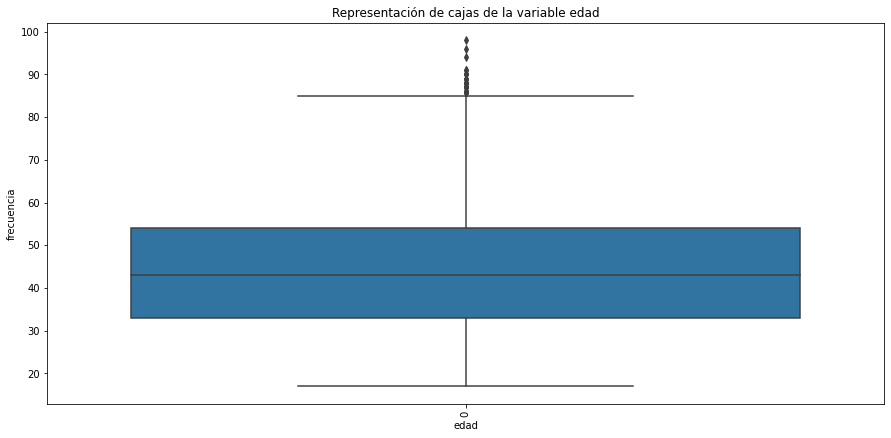

In [14]:
#2.Segmentación por edad
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=df["EDAD"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de la variable edad')
plt.ylabel('frecuencia')
_ = plt.xlabel('edad')

In [15]:
# La segmentación se realizará de 17 a 33 , 34 a 43, 44 a 54 , 55 a 98 basados en los cuartiles , ya que los rangos de edad parecen más razonables. 
# Al ser un problema social, las personas tienen comportamiento similar de acuerdo a la edad

In [16]:
#Dividir el dataset de acuerdo a las edades
grupo_1=df[df["EDAD"]<=33]
grupo_2=df[(df["EDAD"]>33) & (df["EDAD"]<=43) ]
grupo_3=df[(df["EDAD"]>43) & (df["EDAD"]<=54) ]
grupo_4=df[df["EDAD"]>54]

In [17]:
#En cada grupo, rellenar cada uno de los valores nulos con el promedio de cada columna
#Prueba
grupo_1['MB_TOTALES'] = grupo_1['MB_TOTALES'].fillna(grupo_1["MB_TOTALES"].mean())
grupo_1.isnull().sum()

MES                                       0
MB_TOTALES                                0
FACTURACION_TOTAL_IMPUESTOS              25
FACTURACION_CUOTA                        25
SEGUNDOS_LLAMADA_RED_PROPIA              30
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA     30
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA     30
MB_MENSUALES                             59
EDAD                                      0
NUM_LLAMADAS_RED_PROPIA                  30
FACTURACION_TOTAL_SIN_IMPUESTOS          25
NUM_LINEAS_PRIN_POSPAGO                   0
NUM_LINEAS_POSPAGO                        0
NUM_LINEAS_FIJAS                          0
NUM_DIAS_CONVERGENTE                      0
NUM_LINEAS_FIJAS_POSPAGO                  0
NUM_SERVICIOS_POSPAGO                     0
DIAS_PRIMERA_CUENTA                       0
NUM_CANCELACIONES                         0
LLAMADAS_MOVILES                         26
NUM_LINEAS_POSPAGO_TOTAL                  0
TERMINO_FACTURACION                      25
NUM_DESACTIVACIONES_FIJAS_POSPAG

In [18]:
#obtener una lista con las columnas
columnas= list(df.columns)
columnas

['MES',
 'MB_TOTALES',
 'FACTURACION_TOTAL_IMPUESTOS',
 'FACTURACION_CUOTA',
 'SEGUNDOS_LLAMADA_RED_PROPIA',
 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
 'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA',
 'MB_MENSUALES',
 'EDAD',
 'NUM_LLAMADAS_RED_PROPIA',
 'FACTURACION_TOTAL_SIN_IMPUESTOS',
 'NUM_LINEAS_PRIN_POSPAGO',
 'NUM_LINEAS_POSPAGO',
 'NUM_LINEAS_FIJAS',
 'NUM_DIAS_CONVERGENTE',
 'NUM_LINEAS_FIJAS_POSPAGO',
 'NUM_SERVICIOS_POSPAGO',
 'DIAS_PRIMERA_CUENTA',
 'NUM_CANCELACIONES',
 'LLAMADAS_MOVILES',
 'NUM_LINEAS_POSPAGO_TOTAL',
 'TERMINO_FACTURACION',
 'NUM_DESACTIVACIONES_FIJAS_POSPAGO',
 'NUM_DESACTIVACIONES_FIJAS',
 'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA',
 'NUM_DIAS_ACTIVO',
 'MINUTOS_LLAMADAS_MENSUALES',
 'NUM_DIAS_BUNDLE',
 'KPI_IMPUESTOS',
 'NUM_DESACTIVACIONES',
 'PORCENTAJE_SEGUNDOS_RED_PROPIA',
 'SERVICIOS_TOTALES_MARCA',
 'SERVICIOS_TOTALES_POSPAGO',
 'MINUTOS_LLAMADAS_MOVIL',
 'PENETRACION_FIJO_ZONA',
 'TARGET']

In [19]:
#Bucle para rellenar las celdas nulas con el promedio de la columna en cada uno de los 4 grupos
for columna in columnas:
  grupo_1[columna] = grupo_1[columna].fillna(grupo_1[columna].mean())
  grupo_2[columna] = grupo_2[columna].fillna(grupo_2[columna].mean())
  grupo_3[columna] = grupo_3[columna].fillna(grupo_3[columna].mean())
  grupo_4[columna] = grupo_4[columna].fillna(grupo_4[columna].mean())


In [20]:
df_final = pd.concat([grupo_1, grupo_2, grupo_3,grupo_4])
df_final

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,...,166.050007,435,5.555000,0,100.0,1,2,0.0,0.380171,0
7,201909,11362.480835,23.099000,15.700000,4560.0,1755.0,52.0,11362.480835,33.0,123.0,...,48.133301,6,4.009000,0,100.0,1,1,0.0,0.143134,1
9,202008,4892.995117,18.997000,15.700000,4540.0,3340.0,21.0,4892.995117,28.0,68.0,...,59.900100,643,3.297000,0,100.0,1,2,0.0,0.380171,0
11,202011,13808.965820,32.005001,26.450001,11251.0,8460.0,26.0,13808.965820,20.0,98.0,...,183.383398,0,5.555000,0,100.0,1,0,0.0,0.258019,1
14,201910,5878.299316,29.004000,23.969999,3097.0,440.0,10.0,5878.299316,30.0,20.0,...,149.499997,2497,5.034000,0,100.0,1,2,0.0,0.186593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,201902,4645.935547,32.005001,26.450001,0.0,0.0,0.0,4645.935547,62.0,0.0,...,57.983399,0,5.555000,0,100.0,1,1,0.0,0.214143,0
19973,201906,0.000000,7.251000,0.000000,0.0,0.0,0.0,0.000000,83.0,0.0,...,30.500000,0,1.259300,0,100.0,1,1,0.0,0.186593,0
19980,201902,1511.510712,32.200001,25.620000,17999.0,6771.0,63.0,1511.510712,58.0,105.0,...,145.783297,0,5.588201,0,100.0,2,2,0.0,0.264612,1
19991,202004,0.000000,11.170000,0.000000,5687.0,2501.0,13.0,0.000000,56.0,23.0,...,90.600000,0,1.938400,0,100.0,1,1,0.0,0.292565,0


In [21]:
df_final.isnull().sum() # df sin nulos

MES                                     0
MB_TOTALES                              0
FACTURACION_TOTAL_IMPUESTOS             0
FACTURACION_CUOTA                       0
SEGUNDOS_LLAMADA_RED_PROPIA             0
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA    0
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA    0
MB_MENSUALES                            0
EDAD                                    0
NUM_LLAMADAS_RED_PROPIA                 0
FACTURACION_TOTAL_SIN_IMPUESTOS         0
NUM_LINEAS_PRIN_POSPAGO                 0
NUM_LINEAS_POSPAGO                      0
NUM_LINEAS_FIJAS                        0
NUM_DIAS_CONVERGENTE                    0
NUM_LINEAS_FIJAS_POSPAGO                0
NUM_SERVICIOS_POSPAGO                   0
DIAS_PRIMERA_CUENTA                     0
NUM_CANCELACIONES                       0
LLAMADAS_MOVILES                        0
NUM_LINEAS_POSPAGO_TOTAL                0
TERMINO_FACTURACION                     0
NUM_DESACTIVACIONES_FIJAS_POSPAGO       0
NUM_DESACTIVACIONES_FIJAS         

In [22]:
df_final

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,...,166.050007,435,5.555000,0,100.0,1,2,0.0,0.380171,0
7,201909,11362.480835,23.099000,15.700000,4560.0,1755.0,52.0,11362.480835,33.0,123.0,...,48.133301,6,4.009000,0,100.0,1,1,0.0,0.143134,1
9,202008,4892.995117,18.997000,15.700000,4540.0,3340.0,21.0,4892.995117,28.0,68.0,...,59.900100,643,3.297000,0,100.0,1,2,0.0,0.380171,0
11,202011,13808.965820,32.005001,26.450001,11251.0,8460.0,26.0,13808.965820,20.0,98.0,...,183.383398,0,5.555000,0,100.0,1,0,0.0,0.258019,1
14,201910,5878.299316,29.004000,23.969999,3097.0,440.0,10.0,5878.299316,30.0,20.0,...,149.499997,2497,5.034000,0,100.0,1,2,0.0,0.186593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,201902,4645.935547,32.005001,26.450001,0.0,0.0,0.0,4645.935547,62.0,0.0,...,57.983399,0,5.555000,0,100.0,1,1,0.0,0.214143,0
19973,201906,0.000000,7.251000,0.000000,0.0,0.0,0.0,0.000000,83.0,0.0,...,30.500000,0,1.259300,0,100.0,1,1,0.0,0.186593,0
19980,201902,1511.510712,32.200001,25.620000,17999.0,6771.0,63.0,1511.510712,58.0,105.0,...,145.783297,0,5.588201,0,100.0,2,2,0.0,0.264612,1
19991,202004,0.000000,11.170000,0.000000,5687.0,2501.0,13.0,0.000000,56.0,23.0,...,90.600000,0,1.938400,0,100.0,1,1,0.0,0.292565,0


In [23]:
#formateando columna de fecha
fechas=list((df_final["MES"]).astype(str))

In [24]:
anios=[]
meses=[]
for fecha in fechas:
  anios.append(int(fecha[0:4]))
  meses.append(int(fecha[-2:]))

In [25]:
df_final=df_final.drop(['MES'], axis=1)
df_final['anios'] = anios
df_final['meses'] = meses
df_final

,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,...,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET,anios,meses
1,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,26.450001,...,5.555000,0,100.0,1,2,0.0,0.380171,0,2019,11
7,11362.480835,23.099000,15.700000,4560.0,1755.0,52.0,11362.480835,33.0,123.0,19.090000,...,4.009000,0,100.0,1,1,0.0,0.143134,1,2019,9
9,4892.995117,18.997000,15.700000,4540.0,3340.0,21.0,4892.995117,28.0,68.0,15.700000,...,3.297000,0,100.0,1,2,0.0,0.380171,0,2020,8
11,13808.965820,32.005001,26.450001,11251.0,8460.0,26.0,13808.965820,20.0,98.0,26.450001,...,5.555000,0,100.0,1,0,0.0,0.258019,1,2020,11
14,5878.299316,29.004000,23.969999,3097.0,440.0,10.0,5878.299316,30.0,20.0,23.969999,...,5.034000,0,100.0,1,2,0.0,0.186593,0,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,4645.935547,32.005001,26.450001,0.0,0.0,0.0,4645.935547,62.0,0.0,26.450001,...,5.555000,0,100.0,1,1,0.0,0.214143,0,2019,2
19973,0.000000,7.251000,0.000000,0.0,0.0,0.0,0.000000,83.0,0.0,5.991700,...,1.259300,0,100.0,1,1,0.0,0.186593,0,2019,6
19980,1511.510712,32.200001,25.620000,17999.0,6771.0,63.0,1511.510712,58.0,105.0,26.611800,...,5.588201,0,100.0,2,2,0.0,0.264612,1,2019,2
19991,0.000000,11.170000,0.000000,5687.0,2501.0,13.0,0.000000,56.0,23.0,9.231600,...,1.938400,0,100.0,1,1,0.0,0.292565,0,2020,4


ANÁLISIS EXPLORATORIO DE DATOS

Descriptivos básicos del df con el que trabajaremos

In [26]:
df_final.describe()

,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,...,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET,anios,meses
count,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,...,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000,19971.000000
mean,12296.223002,40.944180,25.180367,19286.771033,10333.461153,62.941897,12277.085738,43.990937,156.309652,35.286127,...,5.658052,0.007861,99.975143,1.433128,1.793851,0.914067,0.257050,0.310851,2019.424165,6.060388
std,19989.542508,30.284522,13.048986,31660.311747,18902.778314,93.195358,19990.790023,14.125926,227.024133,27.599576,...,3.546754,0.104425,1.276722,0.757319,1.330402,30.392161,0.070617,0.462853,0.494228,3.321838
min,0.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,-0.001700,...,-1.190000,0.000000,0.000000,1.000000,0.000000,0.000000,0.039562,0.000000,2019.000000,1.000000
25%,1974.883301,24.999001,15.700000,1816.000000,718.000000,12.000000,1957.659851,33.000000,29.000000,20.660000,...,3.297000,0.000000,100.000000,1.000000,1.000000,0.000000,0.199580,0.000000,2019.000000,3.000000
50%,6083.649170,33.005001,23.969999,8159.000000,3702.000000,36.000000,6047.134766,43.000000,88.000000,28.160000,...,5.034000,0.000000,100.000000,1.000000,1.000000,0.000000,0.259692,0.000000,2019.000000,6.000000
75%,15765.799316,50.072500,26.450001,22849.000000,11722.000000,81.000000,15741.505166,54.000000,197.000000,43.311250,...,6.768002,0.000000,100.000000,2.000000,2.000000,0.000000,0.292565,1.000000,2020.000000,9.000000
max,853613.593750,1246.438000,133.890000,584239.000000,422724.000000,6220.000000,853613.593750,98.000000,12497.000000,1223.800001,...,93.483509,4.000000,100.000000,8.000000,18.000000,2089.316758,0.380171,1.000000,2020.000000,12.000000


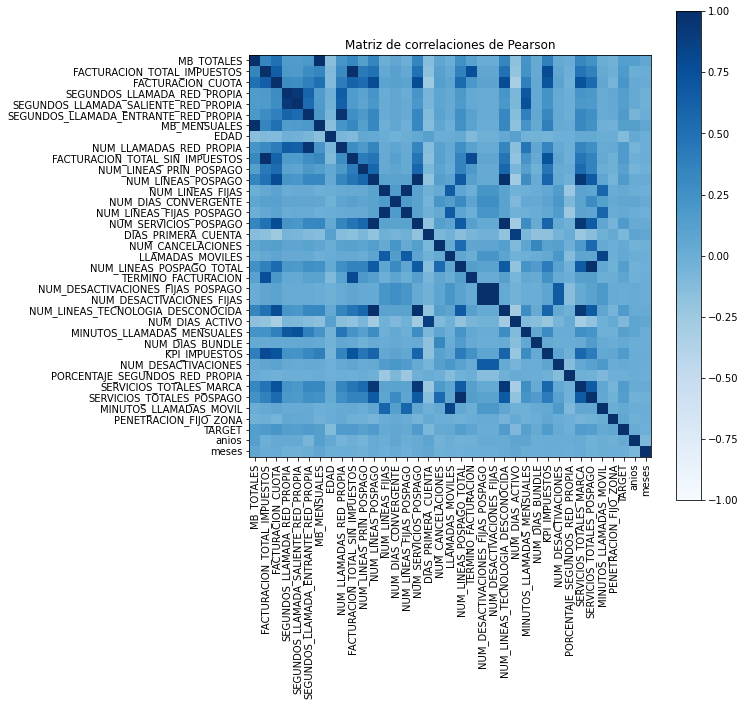

In [27]:
matriz_correlaciones = df_final.corr(method='pearson')
n_ticks = len(df_final.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df_final.columns, rotation='vertical')
plt.yticks(range(n_ticks), df_final.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

In [28]:
matcorre=df_final.corr()
matcorre

,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,...,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET,anios,meses
MB_TOTALES,1.000000,0.341226,0.502400,0.156469,0.161476,0.191698,0.999634,-0.149862,0.212031,0.324925,...,0.385156,0.023703,0.009064,0.321296,0.248409,0.003151,-0.033849,0.133226,0.125440,0.062633
FACTURACION_TOTAL_IMPUESTOS,0.341226,1.000000,0.636994,0.180400,0.178714,0.282685,0.338835,-0.105590,0.297957,0.996787,...,0.782015,0.066470,-0.014497,0.480084,0.371078,0.029906,-0.010663,0.166382,-0.007551,0.008290
FACTURACION_CUOTA,0.502400,0.636994,1.000000,0.283098,0.278855,0.375604,0.500711,-0.110257,0.399872,0.606182,...,0.721983,0.089172,-0.031471,0.733932,0.546087,0.055170,-0.052877,0.209812,0.027471,0.021512
SEGUNDOS_LLAMADA_RED_PROPIA,0.156469,0.180400,0.283098,1.000000,0.936058,0.601194,0.156246,-0.014659,0.651048,0.167558,...,0.236495,0.027466,-0.001490,0.215702,0.192219,0.021406,0.049125,0.137268,0.038974,-0.023344
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,0.161476,0.178714,0.278855,0.936058,1.000000,0.532776,0.161249,-0.038178,0.626486,0.166287,...,0.231991,0.022834,-0.002729,0.192941,0.174000,0.022542,0.040448,0.132791,0.034003,-0.022487
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,0.191698,0.282685,0.375604,0.601194,0.532776,1.000000,0.191246,-0.066156,0.959571,0.267901,...,0.329039,0.023968,-0.001350,0.328628,0.264460,0.021237,0.030356,0.161074,-0.062233,0.000231
MB_MENSUALES,0.999634,0.338835,0.500711,0.156246,0.161249,0.191246,1.000000,-0.149919,0.211573,0.322432,...,0.384146,0.018668,0.011052,0.319730,0.246374,-0.011141,-0.033783,0.132371,0.125462,0.062743
EDAD,-0.149862,-0.105590,-0.110257,-0.014659,-0.038178,-0.066156,-0.149919,1.000000,-0.075631,-0.109065,...,-0.052887,-0.007895,-0.010879,0.040973,0.034766,0.004104,0.010574,-0.122723,0.042675,-0.003751
NUM_LLAMADAS_RED_PROPIA,0.212031,0.297957,0.399872,0.651048,0.626486,0.959571,0.211573,-0.075631,1.000000,0.282461,...,0.346145,0.024368,-0.001323,0.339285,0.270851,0.020550,0.027946,0.169189,-0.054221,-0.002197
FACTURACION_TOTAL_SIN_IMPUESTOS,0.324925,0.996787,0.606182,0.167558,0.166287,0.267901,0.322432,-0.109065,0.282461,1.000000,...,0.729583,0.063693,-0.013099,0.453350,0.354226,0.027716,-0.019040,0.161098,-0.009550,0.007358


In [29]:
#Filtrado de cada una de las columnas con una correlación mayor o igual a 0,95 para seleccionar variables
for i in matcorre:
  val = matcorre[matcorre[i] >= 0.95]
  print(i)
  print(";;;;;;;;;;;")
  print(val)
  print("----------------------------------------------------------")

MB_TOTALES
;;;;;;;;;;;
              MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
MB_TOTALES      1.000000                     0.341226           0.502400   
MB_MENSUALES    0.999634                     0.338835           0.500711   

              SEGUNDOS_LLAMADA_RED_PROPIA  \
MB_TOTALES                       0.156469   
MB_MENSUALES                     0.156246   

              SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
MB_TOTALES                                0.161476   
MB_MENSUALES                              0.161249   

              SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  MB_MENSUALES      EDAD  \
MB_TOTALES                                0.191698      0.999634 -0.149862   
MB_MENSUALES                              0.191246      1.000000 -0.149919   

              NUM_LLAMADAS_RED_PROPIA  FACTURACION_TOTAL_SIN_IMPUESTOS  ...  \
MB_TOTALES                   0.212031                         0.324925  ...   
MB_MENSUALES                 0.211573                   

In [30]:
#Eliminación de variables que mantienen una alta correlación con otras variables, para evitar multicolinealidad
df_modelo=df_final.drop(['MB_MENSUALES','FACTURACION_TOTAL_IMPUESTOS','SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA','NUM_SERVICIOS_POSPAGO','NUM_LINEAS_TECNOLOGIA_DESCONOCIDA','NUM_LINEAS_FIJAS_POSPAGO','SERVICIOS_TOTALES_POSPAGO','NUM_DESACTIVACIONES_FIJAS_POSPAGO'], axis=1)
pd.set_option('display.max_columns', None)
df_modelo

,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,NUM_LINEAS_FIJAS,NUM_DIAS_CONVERGENTE,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,LLAMADAS_MOVILES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET,anios,meses
1,18280.292969,26.450001,13288.0,9194.0,25.0,152.0,26.450001,1,1,0,0,387,1,0.0,2,0.0,0,387.000000,166.050007,435,5.555000,0,100.0,1,0.0,0.380171,0,2019,11
7,11362.480835,15.700000,4560.0,1755.0,33.0,123.0,19.090000,1,1,0,0,3154,0,0.0,1,0.0,0,3154.000000,48.133301,6,4.009000,0,100.0,1,0.0,0.143134,1,2019,9
9,4892.995117,15.700000,4540.0,3340.0,28.0,68.0,15.700000,1,1,0,0,965,1,0.0,2,0.0,0,965.000000,59.900100,643,3.297000,0,100.0,1,0.0,0.380171,0,2020,8
11,13808.965820,26.450001,11251.0,8460.0,20.0,98.0,26.450001,1,1,0,0,121,0,0.0,0,0.0,0,1107.188768,183.383398,0,5.555000,0,100.0,1,0.0,0.258019,1,2020,11
14,5878.299316,23.969999,3097.0,440.0,30.0,20.0,23.969999,1,1,0,0,1086,1,0.0,2,0.0,0,1086.000000,149.499997,2497,5.034000,0,100.0,1,0.0,0.186593,0,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,4645.935547,26.450001,0.0,0.0,62.0,0.0,26.450001,1,1,0,0,359,0,0.0,1,0.0,0,359.000000,57.983399,0,5.555000,0,100.0,1,0.0,0.214143,0,2019,2
19973,0.000000,0.000000,0.0,0.0,83.0,0.0,5.991700,1,1,0,0,2839,0,0.0,1,0.0,0,2839.000000,30.500000,0,1.259300,0,100.0,1,0.0,0.186593,0,2019,6
19980,1511.510712,25.620000,17999.0,6771.0,58.0,105.0,26.611800,1,2,0,0,437,0,0.0,2,0.0,0,387.000000,145.783297,0,5.588201,0,100.0,2,0.0,0.264612,1,2019,2
19991,0.000000,0.000000,5687.0,2501.0,56.0,23.0,9.231600,1,1,0,0,3635,0,0.0,1,0.0,0,3635.000000,90.600000,0,1.938400,0,100.0,1,0.0,0.292565,0,2020,4


In [31]:
col=["NUM_LINEAS_PRIN_POSPAGO","NUM_LINEAS_POSPAGO","NUM_LINEAS_FIJAS","NUM_DESACTIVACIONES","PORCENTAJE_SEGUNDOS_RED_PROPIA","SERVICIOS_TOTALES_MARCA","MINUTOS_LLAMADAS_MOVIL","NUM_DIAS_CONVERGENTE","NUM_CANCELACIONES","LLAMADAS_MOVILES","NUM_LINEAS_POSPAGO_TOTAL","TERMINO_FACTURACION","NUM_DESACTIVACIONES_FIJAS","NUM_DIAS_BUNDLE"]

In [32]:
for cols in col:
  print(cols)
  print(df_modelo.groupby([cols],as_index=False).count()[[cols,"MB_TOTALES"]])
#Como se puede ver en las variables NUM_LINEAS_FIJA , NUM_DESACTIVACIONES,NUM_DIAS_CONVERGENTE,LLAMADAS_MOVILES,  más del 95%  de los datos le corresponde un solo valor , eso significa que no se pueden diferenciar y no explica la variable TARGET, por eso lo quitaría


NUM_LINEAS_PRIN_POSPAGO
   NUM_LINEAS_PRIN_POSPAGO  MB_TOTALES
0                        0          78
1                        1       17296
2                        2        2192
3                        3         339
4                        4          61
5                        5           5
NUM_LINEAS_POSPAGO
   NUM_LINEAS_POSPAGO  MB_TOTALES
0                   1       14370
1                   2        4043
2                   3        1135
3                   4         367
4                   5          50
5                   6           3
6                   7           2
7                   8           1
NUM_LINEAS_FIJAS
   NUM_LINEAS_FIJAS  MB_TOTALES
0                 0       19950
1                 1          20
2                 2           1
NUM_DESACTIVACIONES
   NUM_DESACTIVACIONES  MB_TOTALES
0                    0       19839
1                    1         112
2                    2          16
3                    3           3
4                    4           1
POR

In [33]:
#Eliminación de variables donde más del 95% de los datos se concentra en un solo valor
df_modelo=df_modelo.drop(["NUM_LINEAS_FIJAS" , "NUM_DESACTIVACIONES","NUM_DIAS_CONVERGENTE","LLAMADAS_MOVILES"], axis=1)

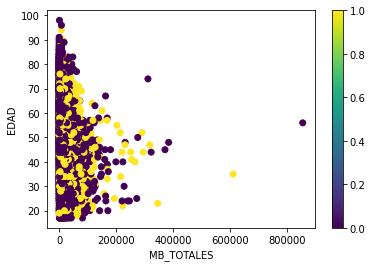

In [34]:
#Gráfico de dispersión de dos variables, acuerdo a la target, esto para  visualizar que no hay separación entre grupos, los puntos están super puestos
data = list(zip(df_modelo["MB_TOTALES"], df_modelo["EDAD"]))
plt.scatter(*zip(*data),c=df_modelo["TARGET"])
plt.xlabel("MB_TOTALES")
plt.ylabel("EDAD")
plt.colorbar()

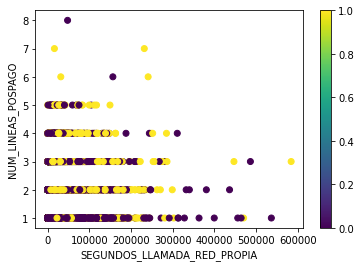

In [35]:
data = list(zip(df_modelo["SEGUNDOS_LLAMADA_RED_PROPIA"], df_modelo["NUM_LINEAS_POSPAGO"]))
plt.scatter(*zip(*data),c=df_modelo["TARGET"])
plt.xlabel("SEGUNDOS_LLAMADA_RED_PROPIA")
plt.ylabel("NUM_LINEAS_POSPAGO")
plt.colorbar()

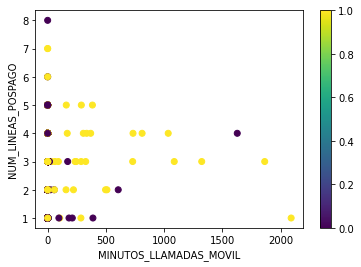

In [36]:
data = list(zip(df_modelo["MINUTOS_LLAMADAS_MOVIL"], df_modelo["NUM_LINEAS_POSPAGO"]))
plt.scatter(*zip(*data),c=df_modelo["TARGET"])
plt.xlabel("MINUTOS_LLAMADAS_MOVIL")
plt.ylabel("NUM_LINEAS_POSPAGO")
plt.colorbar()

In [39]:
#Lista de columnas final
columnas_dfmodelo= list(df_modelo.columns)
columnas_dfmodelo.pop()
columnas_dfmodelo

['MB_TOTALES',
 'FACTURACION_CUOTA',
 'SEGUNDOS_LLAMADA_RED_PROPIA',
 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
 'EDAD',
 'NUM_LLAMADAS_RED_PROPIA',
 'FACTURACION_TOTAL_SIN_IMPUESTOS',
 'NUM_LINEAS_PRIN_POSPAGO',
 'NUM_LINEAS_POSPAGO',
 'DIAS_PRIMERA_CUENTA',
 'NUM_CANCELACIONES',
 'NUM_LINEAS_POSPAGO_TOTAL',
 'TERMINO_FACTURACION',
 'NUM_DESACTIVACIONES_FIJAS',
 'NUM_DIAS_ACTIVO',
 'MINUTOS_LLAMADAS_MENSUALES',
 'NUM_DIAS_BUNDLE',
 'KPI_IMPUESTOS',
 'PORCENTAJE_SEGUNDOS_RED_PROPIA',
 'SERVICIOS_TOTALES_MARCA',
 'MINUTOS_LLAMADAS_MOVIL',
 'PENETRACION_FIJO_ZONA',
 'TARGET',
 'anios']

Todas las variables independientes son cuantitativas, al tener diferente escala entre ellas, las normalizaremos para usar una escala común

In [40]:
#Guardaremos una copia de las variables cuantitativas sin incluir el año y mes
X_cuants = df_modelo[columnas_dfmodelo].copy()

In [41]:
#Estandarización y transformación de los datos.
scaler = MinMaxScaler(feature_range=(0, 1))
X_escalado = scaler.fit_transform(X_cuants)
X_escalado = pd.DataFrame(X_escalado,columns=X_cuants.columns)

X_escalado.head()

,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET,anios
0,0.021415,0.197550,0.022744,0.021749,0.098765,0.012163,0.021614,0.2,0.0,0.078040,0.045455,0.105263,0.0,0.0,0.078040,0.013482,0.107249,0.071245,1.0,0.0,0.0,1.000000,0.0,0.0
1,0.013311,0.117260,0.007805,0.004152,0.197531,0.009842,0.015600,0.2,0.0,0.636015,0.000000,0.052632,0.0,0.0,0.636015,0.003908,0.001479,0.054915,1.0,0.0,0.0,0.304080,1.0,0.0
2,0.005732,0.117260,0.007771,0.007901,0.135802,0.005441,0.012830,0.2,0.0,0.194596,0.045455,0.105263,0.0,0.0,0.194596,0.004864,0.158531,0.047394,1.0,0.0,0.0,1.000000,0.0,1.0
3,0.016177,0.197550,0.019258,0.020013,0.037037,0.007842,0.021614,0.2,0.0,0.024400,0.000000,0.000000,0.0,0.0,0.223269,0.014890,0.000000,0.071245,1.0,0.0,0.0,0.641371,1.0,1.0
4,0.006886,0.179028,0.005301,0.001041,0.160494,0.001600,0.019588,0.2,0.0,0.218996,0.045455,0.105263,0.0,0.0,0.218996,0.012138,0.615631,0.065742,1.0,0.0,0.0,0.431671,0.0,0.0


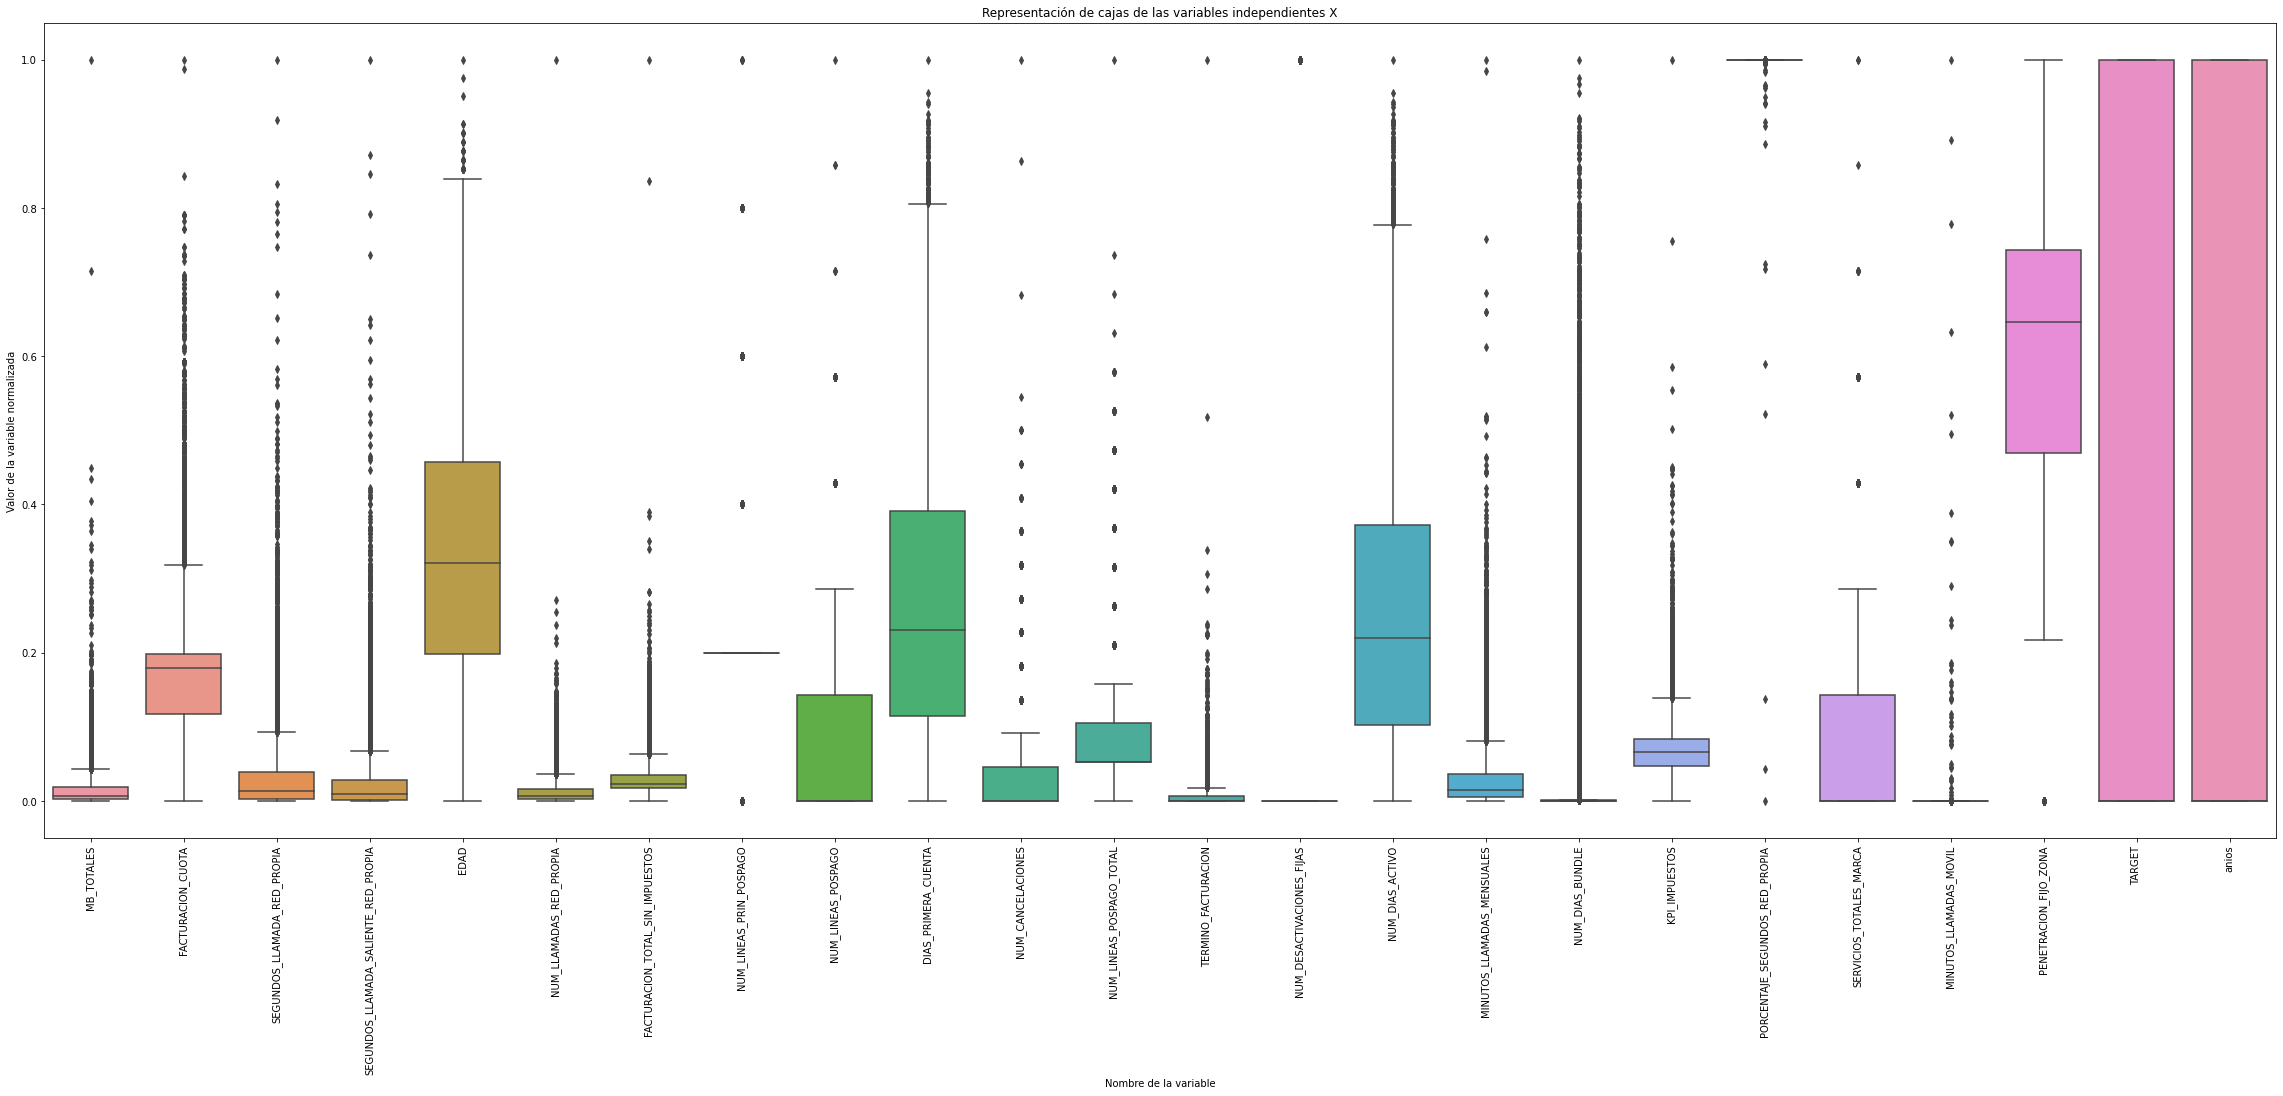

In [42]:
#Visualizamos Variables independientes
plt.figure(figsize=(40,15))
ax = sns.boxplot(data=X_escalado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

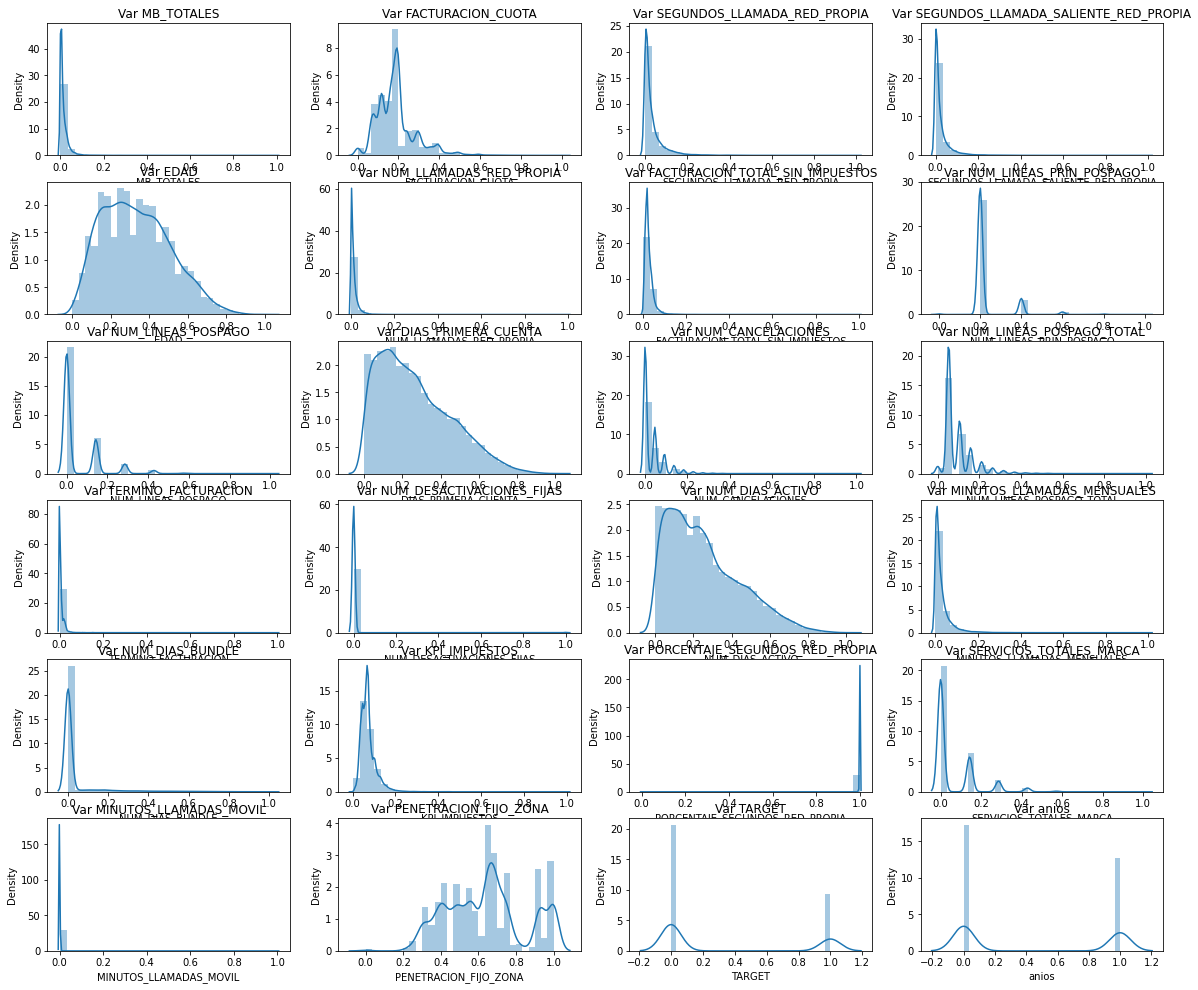

In [43]:
#Histogramas
plt.figure(figsize=(20,20))
n = 0
for i, column in enumerate(X_escalado.columns):
    n+=1
    plt.subplot(7, 4, n)
    sns.distplot(X_escalado[column], bins=30)
    plt.title('Var {}'.format(column))
plt.show()

Análisis exploratorio de datos relacionando las variables independientes con respecto a la target

In [44]:
#División de variables x e y
X = X_escalado.drop(['TARGET'],axis=1)
Y = X_escalado['TARGET']

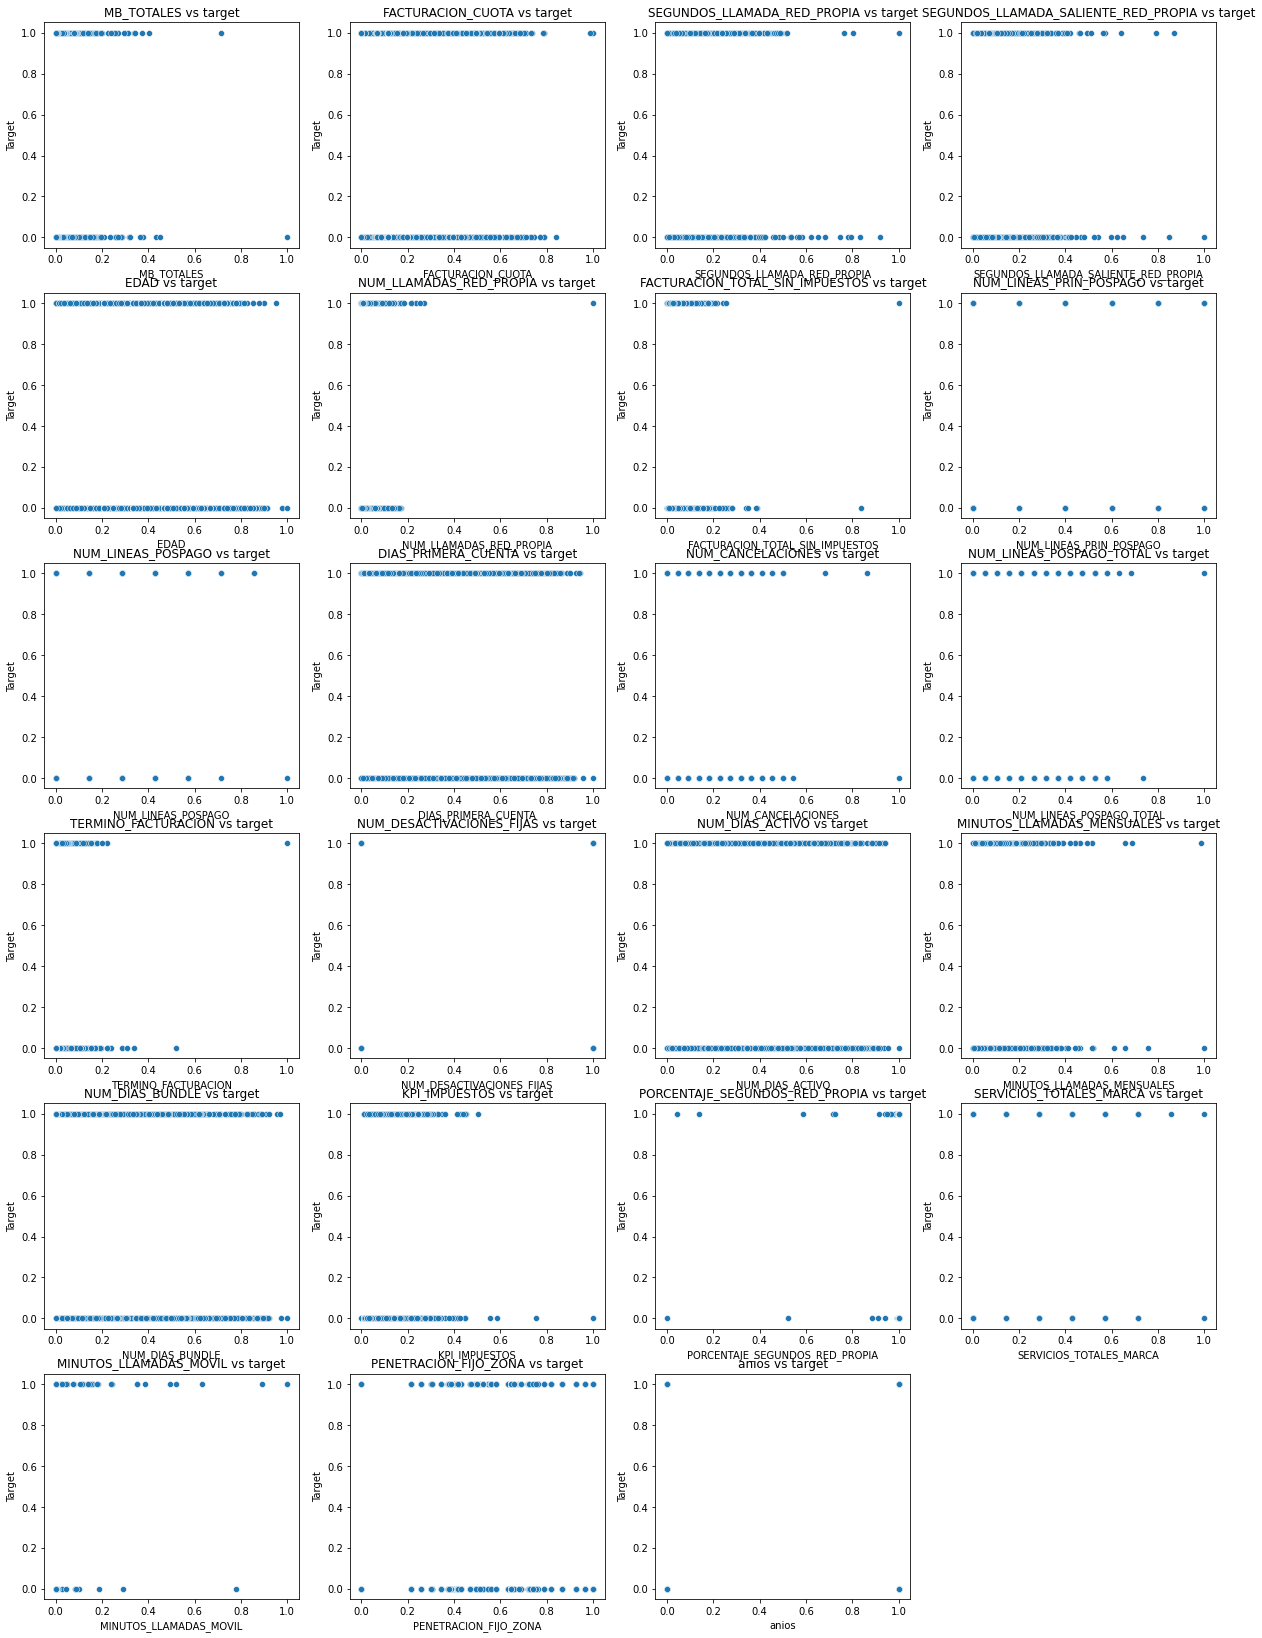

In [45]:
#Relacion de las variables con target
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()
relaciones_vs_target(X, Y)

In [46]:
#Ordenamos correlaciones con la target
matcorre1=X_cuants.corr()
matcorre1["TARGET"].sort_values(ascending=False)

TARGET                                  1.000000
FACTURACION_CUOTA                       0.209812
NUM_LLAMADAS_RED_PROPIA                 0.169189
KPI_IMPUESTOS                           0.167068
NUM_LINEAS_POSPAGO                      0.162840
FACTURACION_TOTAL_SIN_IMPUESTOS         0.161098
SERVICIOS_TOTALES_MARCA                 0.156162
NUM_LINEAS_POSPAGO_TOTAL                0.139960
SEGUNDOS_LLAMADA_RED_PROPIA             0.137268
MB_TOTALES                              0.133226
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA    0.132791
MINUTOS_LLAMADAS_MENSUALES              0.122012
NUM_LINEAS_PRIN_POSPAGO                 0.116230
TERMINO_FACTURACION                     0.074928
PENETRACION_FIJO_ZONA                   0.062062
NUM_DIAS_BUNDLE                         0.037189
NUM_CANCELACIONES                       0.034371
MINUTOS_LLAMADAS_MOVIL                  0.032519
anios                                   0.017465
NUM_DESACTIVACIONES_FIJAS               0.009802
PORCENTAJE_SEGUNDOS_

In [47]:
###ninguna variable es buena para predecir target

MODELO DE CLUSTERING

In [48]:
#Modelo K-Means 
model = KMeans(n_clusters=2,random_state=0)
model.fit(X)

KMeans(n_clusters=2, random_state=0)

In [49]:
# Dataframe con variables originales y la predicción 
df_total = X.copy()
df_total['cluster']=model.predict(X)
df_total[:5]

,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,anios,cluster
0,0.021415,0.197550,0.022744,0.021749,0.098765,0.012163,0.021614,0.2,0.0,0.078040,0.045455,0.105263,0.0,0.0,0.078040,0.013482,0.107249,0.071245,1.0,0.0,0.0,1.000000,0.0,1
1,0.013311,0.117260,0.007805,0.004152,0.197531,0.009842,0.015600,0.2,0.0,0.636015,0.000000,0.052632,0.0,0.0,0.636015,0.003908,0.001479,0.054915,1.0,0.0,0.0,0.304080,0.0,1
2,0.005732,0.117260,0.007771,0.007901,0.135802,0.005441,0.012830,0.2,0.0,0.194596,0.045455,0.105263,0.0,0.0,0.194596,0.004864,0.158531,0.047394,1.0,0.0,0.0,1.000000,1.0,0
3,0.016177,0.197550,0.019258,0.020013,0.037037,0.007842,0.021614,0.2,0.0,0.024400,0.000000,0.000000,0.0,0.0,0.223269,0.014890,0.000000,0.071245,1.0,0.0,0.0,0.641371,1.0,0
4,0.006886,0.179028,0.005301,0.001041,0.160494,0.001600,0.019588,0.2,0.0,0.218996,0.045455,0.105263,0.0,0.0,0.218996,0.012138,0.615631,0.065742,1.0,0.0,0.0,0.431671,0.0,1


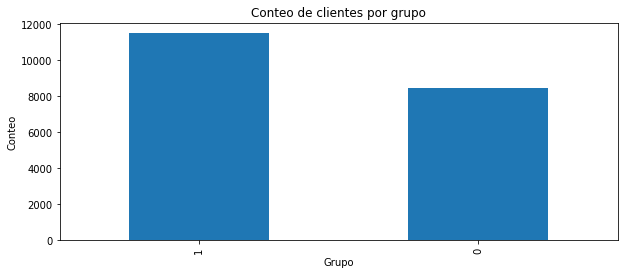

In [50]:
df_total.cluster.value_counts().plot(kind='bar', figsize=(10,4))
plt.title('Conteo de clientes por grupo')
plt.xlabel('Grupo')
_ = plt.ylabel('Conteo')

In [51]:
# Dataframe con las medias de las variables en cada uno de los grupos
descriptivos_grupos = df_total.groupby(['cluster'],as_index=False).mean()
descriptivos_grupos

,cluster,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,anios
0,0,0.017827,0.191187,0.035473,0.026216,0.341893,0.011360,0.028584,0.224743,0.056698,0.284211,0.029030,0.092824,0.005844,0.003423,0.270815,0.033034,0.037199,0.072763,0.999873,0.064303,0.000533,0.634586,1.0
1,1,0.011884,0.185770,0.031199,0.023140,0.326834,0.013353,0.029019,0.233861,0.053242,0.251678,0.033881,0.096320,0.006539,0.001565,0.241460,0.026674,0.036394,0.072017,0.999662,0.060087,0.000367,0.641430,0.0


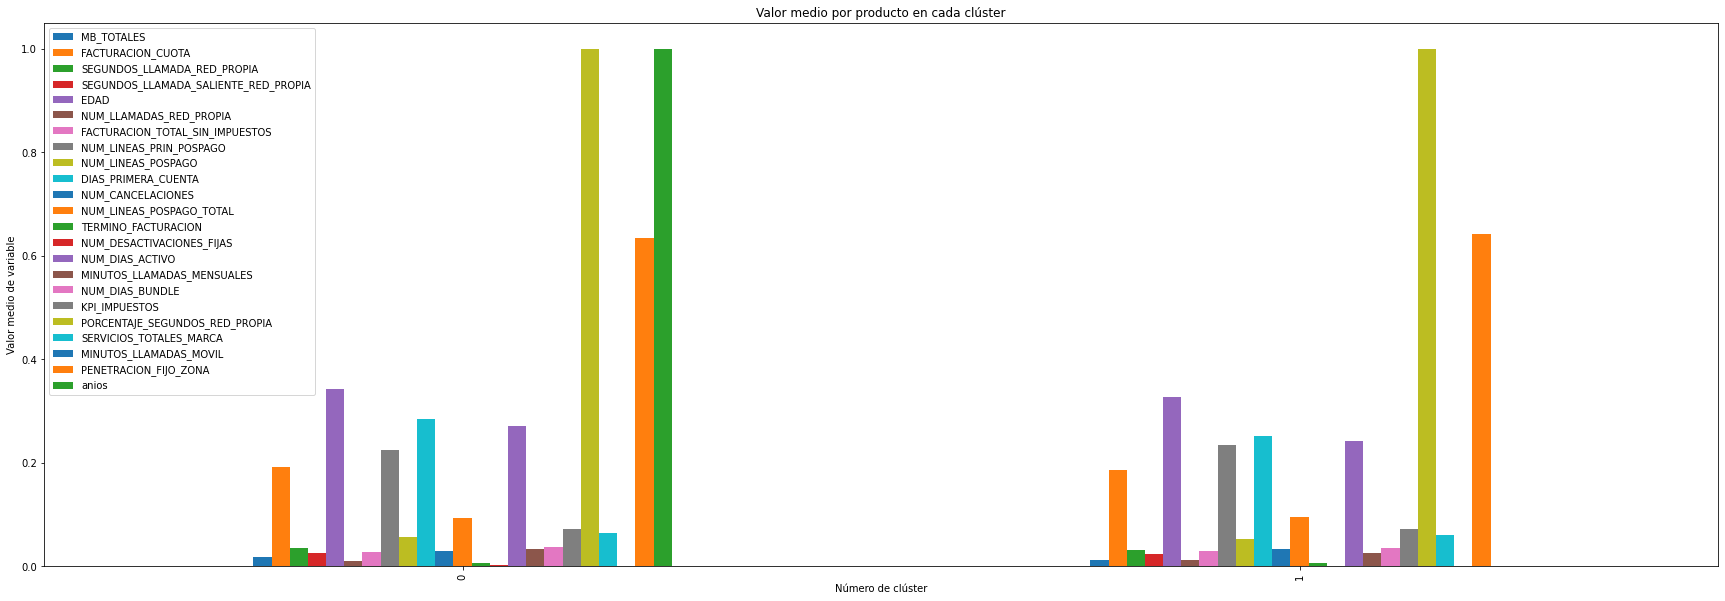

In [52]:
#Representación de clùsters y medias de las variables
df_total.groupby('cluster').mean().plot(kind='bar', figsize=(30,10))
plt.title('Valor medio por producto en cada clúster')
plt.xlabel(u'Número de clúster')
_ = plt.ylabel('Valor medio de variable')

UNIÓN DE DATAFRAME COMPLETO DE VARIABLES X QUE CONTIENEN LOS CLUSTER CON LA TARGET

In [53]:
Y=pd.DataFrame(Y,columns= ['TARGET'])
#Crear un id en Y
id= []
for i in range(len(Y)):
  id.append(0+i)
Y.insert(0,'id', id)
Y.shape

(19971, 2)

In [54]:
#Crear un id e df_total 
id= []
for i in range(len(df_total)):
  id.append(0+i)
df_total.insert(0,'id', id)
df_total.head()


,id,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,anios,cluster
0,0,0.021415,0.197550,0.022744,0.021749,0.098765,0.012163,0.021614,0.2,0.0,0.078040,0.045455,0.105263,0.0,0.0,0.078040,0.013482,0.107249,0.071245,1.0,0.0,0.0,1.000000,0.0,1
1,1,0.013311,0.117260,0.007805,0.004152,0.197531,0.009842,0.015600,0.2,0.0,0.636015,0.000000,0.052632,0.0,0.0,0.636015,0.003908,0.001479,0.054915,1.0,0.0,0.0,0.304080,0.0,1
2,2,0.005732,0.117260,0.007771,0.007901,0.135802,0.005441,0.012830,0.2,0.0,0.194596,0.045455,0.105263,0.0,0.0,0.194596,0.004864,0.158531,0.047394,1.0,0.0,0.0,1.000000,1.0,0
3,3,0.016177,0.197550,0.019258,0.020013,0.037037,0.007842,0.021614,0.2,0.0,0.024400,0.000000,0.000000,0.0,0.0,0.223269,0.014890,0.000000,0.071245,1.0,0.0,0.0,0.641371,1.0,0
4,4,0.006886,0.179028,0.005301,0.001041,0.160494,0.001600,0.019588,0.2,0.0,0.218996,0.045455,0.105263,0.0,0.0,0.218996,0.012138,0.615631,0.065742,1.0,0.0,0.0,0.431671,0.0,1


In [55]:
#Unir df_total ( df que contiene mis variables x ya con las columnas de cluster) con el df Y
df_total=df_total.merge(Y, on="id", how="left")
df_total.head(5)


,id,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,anios,cluster,TARGET
0,0,0.021415,0.197550,0.022744,0.021749,0.098765,0.012163,0.021614,0.2,0.0,0.078040,0.045455,0.105263,0.0,0.0,0.078040,0.013482,0.107249,0.071245,1.0,0.0,0.0,1.000000,0.0,1,0.0
1,1,0.013311,0.117260,0.007805,0.004152,0.197531,0.009842,0.015600,0.2,0.0,0.636015,0.000000,0.052632,0.0,0.0,0.636015,0.003908,0.001479,0.054915,1.0,0.0,0.0,0.304080,0.0,1,1.0
2,2,0.005732,0.117260,0.007771,0.007901,0.135802,0.005441,0.012830,0.2,0.0,0.194596,0.045455,0.105263,0.0,0.0,0.194596,0.004864,0.158531,0.047394,1.0,0.0,0.0,1.000000,1.0,0,0.0
3,3,0.016177,0.197550,0.019258,0.020013,0.037037,0.007842,0.021614,0.2,0.0,0.024400,0.000000,0.000000,0.0,0.0,0.223269,0.014890,0.000000,0.071245,1.0,0.0,0.0,0.641371,1.0,0,1.0
4,4,0.006886,0.179028,0.005301,0.001041,0.160494,0.001600,0.019588,0.2,0.0,0.218996,0.045455,0.105263,0.0,0.0,0.218996,0.012138,0.615631,0.065742,1.0,0.0,0.0,0.431671,0.0,1,0.0


APLICACIÓN DEL MODELO REGRESIÓN LOGÍSTICA

In [56]:
#dataframe resultante cluster 1
df_modelo1=df_total[df_total["cluster"]==0]
df_modelo1.head(2)

,id,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,anios,cluster,TARGET
2,2,0.005732,0.11726,0.007771,0.007901,0.135802,0.005441,0.012830,0.2,0.0,0.194596,0.045455,0.105263,0.0,0.0,0.194596,0.004864,0.158531,0.047394,1.0,0.0,0.0,1.000000,1.0,0,0.0
3,3,0.016177,0.19755,0.019258,0.020013,0.037037,0.007842,0.021614,0.2,0.0,0.024400,0.000000,0.000000,0.0,0.0,0.223269,0.014890,0.000000,0.071245,1.0,0.0,0.0,0.641371,1.0,0,1.0


In [57]:
#Verificación de balanceado del df de acuerdo con la target
gb=df_modelo1.groupby("TARGET").count()
gb
#El porcentaje de 0 en target es 74% y de 1 es de 26%, se encuentra balanceado.

,id,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,anios,cluster
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758,5758
1.0,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713,2713


In [58]:
# Se define x e y
X_modelo1 = df_modelo1.drop(['TARGET',"id","cluster"] ,axis=1)
y_modelo1 = df_modelo1['TARGET']


In [59]:
# Se divide el dataset en Train + Test 
X_train, X_test, Y_train, Y_test = train_test_split(X_modelo1, y_modelo1, test_size=0.30, random_state=0)
print(u'Dimensiones en train \n-X:{}\n-Y:{}'.format(X_train.shape, Y_train.shape))
print(u'Dimensiones en test \n-X:{}\n-Y:{}'.format(X_test.shape, Y_test.shape))


Dimensiones en train 
-X:(5929, 23)
-Y:(5929,)
Dimensiones en test 
-X:(2542, 23)
-Y:(2542,)


In [60]:
#Se aplica un modelo de regresión logística
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

Con GridSearchCV se realiza una optimización. Esta función lo que hace es ajustar el modelo que se pasa como argumento con todas las combinaciones posibles de los parámetros. En este caso, todas las combinaciones de **C** (factor de regularización) y **class_weights**(peso de las clases.

In [61]:
#aplicamos GridSearch, CV determina la estrategia de división de validación cruzada
modelo_gs = GridSearchCV(modelo, param_grid=parametros,
                         cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [64]:
#mejores parametros 
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.66


In [65]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

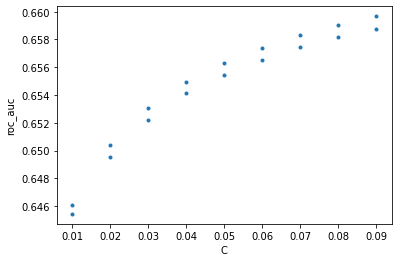

In [67]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

In [68]:
#Nos quedamos con los mejores parametros y analizamos el mejor alfa
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [69]:
#ajustamos datos de entrenamiento
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

In [70]:
# validamos el modelo elegido ya optimizado y predecimos test
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

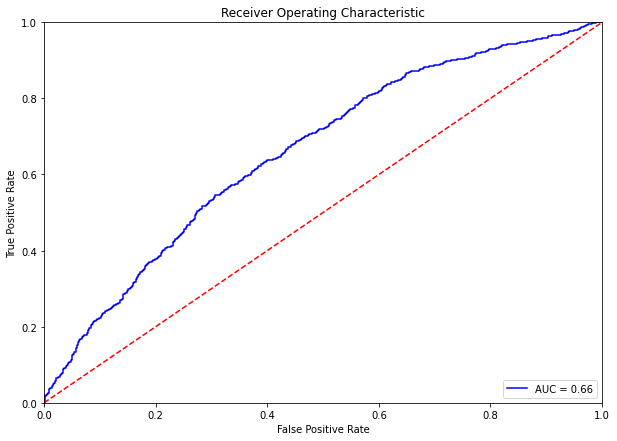

In [71]:
#Visualizamos
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
#UMBRALIZO PREDICCIONES
umbral = 0.5
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)


Accuracy	0.62
Sensitividad	0.6
Precisión	0.42


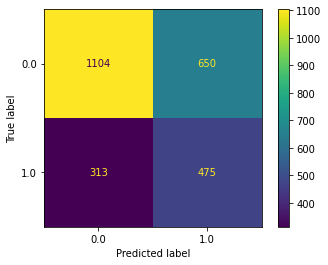

In [73]:
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))    
metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_umbralizadas)
plt.show()

APLICACIÓN DEL MODELO REDES NEURONALES

In [74]:
#Definiendo el segundo clúster
df_modelo2=df_total[df_total["cluster"]==1]
df_modelo2.head(10)

,id,MB_TOTALES,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,NUM_LINEAS_PRIN_POSPAGO,NUM_LINEAS_POSPAGO,DIAS_PRIMERA_CUENTA,NUM_CANCELACIONES,NUM_LINEAS_POSPAGO_TOTAL,TERMINO_FACTURACION,NUM_DESACTIVACIONES_FIJAS,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,anios,cluster,TARGET
0,0,0.021415,0.197550,0.022744,0.021749,0.098765,0.012163,0.021614,0.2,0.000000,0.078040,0.045455,0.105263,0.000000,0.0,0.078040,0.013482,0.107249,0.071245,1.0,0.000000,0.0,1.000000,0.0,1,0.0
1,1,0.013311,0.117260,0.007805,0.004152,0.197531,0.009842,0.015600,0.2,0.000000,0.636015,0.000000,0.052632,0.000000,0.0,0.636015,0.003908,0.001479,0.054915,1.0,0.000000,0.0,0.304080,0.0,1,1.0
4,4,0.006886,0.179028,0.005301,0.001041,0.160494,0.001600,0.019588,0.2,0.000000,0.218996,0.045455,0.105263,0.000000,0.0,0.218996,0.012138,0.615631,0.065742,1.0,0.000000,0.0,0.431671,0.0,1,0.0
5,5,0.007779,0.240720,0.095745,0.040613,0.123457,0.016084,0.027972,0.2,0.142857,0.101230,0.000000,0.105263,0.001792,0.0,0.100423,0.026798,0.000000,0.084068,1.0,0.142857,0.0,0.304080,0.0,1,0.0
7,7,0.001762,0.179028,0.013159,0.004663,0.160494,0.011523,0.037565,0.2,0.000000,0.295624,0.000000,0.052632,0.019713,0.0,0.295624,0.030571,0.000000,0.065742,1.0,0.000000,0.0,0.387475,0.0,1,1.0
9,9,0.004225,0.086414,0.003704,0.000026,0.197531,0.001280,0.014179,0.2,0.000000,0.239968,0.000000,0.052632,0.000000,0.0,0.239968,0.000000,0.000247,0.051060,1.0,0.000000,0.0,1.000000,0.0,1,0.0
10,10,0.019865,0.197550,0.027535,0.028387,0.086420,0.013683,0.021614,0.2,0.000000,0.123210,0.227273,0.315789,0.000000,0.0,0.022787,0.037608,0.198718,0.071245,1.0,0.000000,0.0,1.000000,0.0,1,1.0
11,11,0.006081,0.117260,0.000284,0.000229,0.111111,0.000480,0.012830,0.2,0.000000,0.127647,0.000000,0.052632,0.000000,0.0,0.127647,0.004006,0.000000,0.047394,1.0,0.000000,0.0,0.494030,0.0,1,0.0
12,12,0.026107,0.197550,0.006295,0.007762,0.074074,0.005841,0.046063,0.2,0.000000,0.483162,0.000000,0.052632,0.019713,0.0,0.483162,0.009678,0.000740,0.088810,1.0,0.000000,0.0,1.000000,0.0,1,0.0
13,13,0.030038,0.197550,0.004695,0.005148,0.172840,0.001920,0.010804,0.2,0.000000,0.269611,0.000000,0.052632,0.000000,0.0,0.223269,0.004095,0.000247,0.041902,1.0,0.000000,0.0,0.415007,0.0,1,0.0


In [75]:
df_modelo2.shape

(11500, 26)

In [76]:
# Se define x e y para modelo 2
X_modelo2 = df_modelo2.drop(['TARGET',"id","cluster"], axis=1)
Y_modelo2 = df_modelo2['TARGET']

In [77]:
X_trainm2, X_testm2, Y_trainm2, Y_testm2 = train_test_split(X_modelo2, Y_modelo2 ,test_size=0.2, random_state=0)

In [80]:
def constructor_modelo():
    # Definición del modelo
    modelo = keras.Sequential([
    layers.Dense(64, activation='relu',input_shape=[X_trainm2.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,activation='softmax')])
    
    # Definición del optimizador
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    # Compilación del modelo
    modelo.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['Accuracy'])
    return modelo

In [81]:
model = constructor_modelo()

In [82]:
# podemos ver las cuatro capas que tiene y los parámetros en cada una de las capas
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1536      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________


In [83]:
#ejemplo incluyendo 200 épocas 
#Entrenamos el modelo durante xxx épocas y registramos la precisión de entrenamiento y validación en el objeto history. Ejemplo sin early_stop
# Muestro un punto por cada una de las épocas completadas
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 200
historico = model.fit(X_trainm2, Y_trainm2, 
                    epochs=EPOCHS,
                    validation_split = 0.2, 
                    verbose=2,
                    )

Epoch 1/200
230/230 - 1s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 1s/epoch - 6ms/step
Epoch 2/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 279ms/epoch - 1ms/step
Epoch 3/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 275ms/epoch - 1ms/step
Epoch 4/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 298ms/epoch - 1ms/step
Epoch 5/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 268ms/epoch - 1ms/step
Epoch 6/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 279ms/epoch - 1ms/step
Epoch 7/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 315ms/epoch - 1ms/step
Epoch 8/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - 

In [84]:
model = constructor_modelo()
# Patience es el número de épocas sin mejora antes de parar el entrenamiento
early_stop = keras.callbacks.EarlyStopping(monitor= "Accuracy", patience=5)

history = model.fit(X_trainm2, Y_trainm2, 
                    epochs=EPOCHS,
                    validation_split = 0.2, 
                    verbose=2,
                    callbacks=[early_stop] 
                    )

#el validation_split es la técnica de validación cruzada para evitar el sobreajuste
#a partir de las xxx épocas ya no se optimiza más la métrica 

Epoch 1/200
230/230 - 1s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 846ms/epoch - 4ms/step
Epoch 2/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 294ms/epoch - 1ms/step
Epoch 3/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 268ms/epoch - 1ms/step
Epoch 4/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 267ms/epoch - 1ms/step
Epoch 5/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 274ms/epoch - 1ms/step
Epoch 6/200
230/230 - 0s - loss: 0.0000e+00 - Accuracy: 0.3030 - val_loss: 0.0000e+00 - val_Accuracy: 0.3147 - 291ms/epoch - 1ms/step


In [85]:
#Ninguna de las métricas mejora con cada época
# por lo que no tiene sentido realizar el gráfico ya que saldrá una línea recta para cualquier métrica.
#Los datos no son buenos predictores de la variable objetivo. 
#En la representación de las variables independientes con la target se observa esto.
